In [6]:
import sklearn
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = svm.SVC(gamma='scale', random_state=0)
cross_val_score(clf, X, y, scoring='recall_macro',
                cv=5)  
#array([0.96..., 0.96..., 0.96..., 0.93..., 1.        ])
sorted(sklearn.metrics.SCORERS.keys()) #列出所有的scorers 适用于 classification Clustering regression

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [ ]:
#常用的十大评估标准
# 1.accuracy_score
#分类准确率分数是指所有分类正确的百分比。
#sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)
#0.5
accuracy_score(y_true, y_pred, normalize=False)
#2

In [22]:
# 2.recall_score 回率 =提取出的正确信息条数 /样本中的信息条数。通俗地说，就是所有准确的条目有多少被检索出来了。
#klearn.metrics.recall_score(y_true, y_pred, labels=None, pos_label=1,average='binary', sample_weight=None)

from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2,2]
y_pred = [0, 2, 1, 0, 0, 1,1]
recall_score(y_true, y_pred, average='macro') #平均所有类别进行计算得分
# #0.33...
recall_score(y_true, y_pred, average='micro') #针对每个样本进行加权计算得分
#0.2857142857142857
recall_score(y_true, y_pred, average='weighted') #针对类别进行加权计算得分
#0.2857142857142857
recall_score(y_true, y_pred, average=None) #返回每一类的得分
#array([1.,  0., 0.])


array([ 1.,  0.,  0.])

In [ ]:
# 3. ROC ROC曲线下的面积是模型准确率的度量，AUC max
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr
#array([0. ,  0.5,  0.5, 1. ]) FPR = FP /（FP + TN） （被预测为负的负样本结果数 /负样本实际数）
tpr
#array([0.5,  0.5,  1. , 1. ]) TPR = TP /（TP + FN）  （正样本预测结果数 / 正样本实际数）
thresholds
#array([0.8 ,  0.4 ,  0.35, 0.1 ]) 阈值，正样本置信区间
from sklearn.metrics import auc 
metrics.auc(fpr, tpr) 
#0.75 

fpr: [ 0.   0.   0.5  0.5  1. ]
tpr: [ 0.   0.5  0.5  1.   1. ]
thresholds: [ 1.8   0.8   0.4   0.35  0.1 ]
AUC: 0.75


####################################################


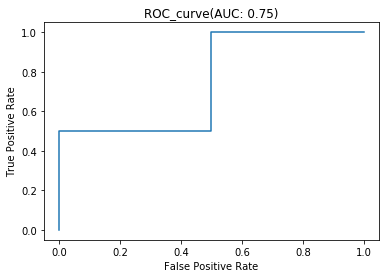

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve  
 
y = np.array([1,1,2,2])  
pred = np.array([0.1, 0.4, 0.35, 0.8])  
fpr, tpr, thresholds = roc_curve(y, pred, pos_label=2) 
print('fpr: ' + str(fpr))
print('tpr: ' + str(tpr))
print('thresholds: ' + str(thresholds))
 
 
from sklearn.metrics import auc  
AUC = auc(fpr, tpr) 
print('AUC: ' + str(AUC))
 
print('\n\n####################################################')
# help(roc_curve)
plt.plot(fpr, tpr)  
plt.title('ROC_curve' + '(AUC: ' + str(AUC) + ')' )  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show()  

In [23]:
# 4. Auc
# 计算AUC值，其中x,y分别为数组形式，根据(xi,yi)在坐标上的点，生成的曲线，然后计算AUC值；
# sklearn.metrics.auc(x, y, reorder=False)

# 5. roc_auc_score
# 直接根据真实值（必须是二值）、预测值（可以是0/1,也可以是proba值）计算出auc值，中间过程的roc计算省略。
# sklearn.metrics.roc_auc_score(y_true, y_score, average='macro', sample_weight=None)
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

In [26]:
# 6. confusion_matrix 混淆矩阵
# 观察各个种类分类的结果
#sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)
# array([[2,0, 0],
#        [0, 0, 1],
#        [1, 0, 2]])

#use the label
y_true = ["cat", "ant", "cat", "cat","ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat","ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird","cat"])
# https://blog.csdn.net/CherDW/article/details/55813071


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [27]:
# metric.scores已经对3种模型封装了基本的评分函数，我们也可以使用make_scorer标准化自定义的函数，让scikit-learn对象可以使用它。
#sklearn.metrics.make_scorer(score_func, greater_is_better=True, needs_proba=False, needs_threshold=False, **kwargs)
# 从库中包装现有的度量函数，更改其参数。
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2) 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
                    scoring=ftwo_scorer, cv=5)

In [39]:
# metric.scores 自定义度量函数并标准化
import numpy as np
def my_custom_loss_func(y_true, y_pred):
    diff = np.abs(y_true - y_pred).max()
    return np.log1p(diff)
# score will negate the return value of my_custom_loss_func,
# which will be np.log(2), 0.693, given the values for X
# and y defined below.
score = make_scorer(my_custom_loss_func, greater_is_better=False)#greater_is_better默认极大化度量函数
X = [[1], [1],[2],[3],[0]]
y = [0, 1,1,1,0]
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf = clf.fit(X, y)
# my_custom_loss_func(clf.predict(X), y) 
# 0.69...
score(clf, X, y) 

cross_val_score(clf,X,  y, scoring=make_scorer(my_custom_loss_func, greater_is_better=False),  cv=2, n_jobs=-1) #cv决定每次划分测试集数量，向上取整，目前测试集每次3个


array([-0.69314718, -0.69314718])

In [4]:
 #  classification_report，列出一个模型的多个评估标准
#参数补充：一半准确度的计算方式不能表达出模型的分类能力，在多分类时，不能看到每种类别的分类正确情况
#宏平均(micro-average)
# 属于类C的样本被正确分类到类C，记这一类样本数为 TP
# 不属于类C的样本被错误分类到类C，记这一类样本数为 FP
# 属于类别C的样本被错误分类到类C的其他类，记这一类样本数为 TN
# 不属于类别C的样本被正确分类到了类别C的其他类，记这一类样本数为 FN  
#一类别的准确率，precision = TP / (TP + FP) 
#召回率 recall = TP / (TP + TN) 但是这两种指标也只是片面的评估某类的分类情况
#现在就引入F-measure，将二者结合起来，计算公式如下：F- measure = (A + 1) * precision * recall / (A ^ 2 * precision + recall)
#当A取1时，称为调和均值，也就是F1-score

#把所有类的F1值取一个算术平均就得到了Macro-average宏平均
#微平均Micro-average=(TP + FP) / (TP + TN + FP + FN)，即一般评估的准确度，一般情况下 宏平均优于微，看数据再定
#此report下的avg 每行3个数据，分别对准确率，召回率，f1值进行了计算。
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0,3]
y_pred = [0, 0, 2, 2, 0,3]
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      1.00      1.00         2
     class 3       1.00      1.00      1.00         1

   micro avg       0.83      0.83      0.83         6
   macro avg       0.67      0.75      0.70         6
weighted avg       0.72      0.83      0.77         6



C:\Users\SBY\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
#Hinge loss  以上各种都是一些常用的评估方法，然后评估器就是评估方法的集成，明白二者关系后即可以自由构造评估器
#当为二分类时，可以使用铰链损失来进行评估，当为多分类时，则用其变体Crammer＆Singer的多类变体
#二分类铰链公式：y为真实种类，w为预测输出
#L(y,w)=max{1-wy,0}   
#多分类演示
from sklearn import svm
from sklearn.metrics import hinge_loss
X = np.array([[0], [1], [2], [3]])
Y = np.array([0, 1, 2, 3])
labels = np.array([0, 1, 2, 3])
est = svm.LinearSVC()
est.fit(X, Y)
pred_decision = est.decision_function([[-1], [2], [3]])
y_true = [0, 2, 3]
weight = [1,1,10]   #计算多分类铰链时可选参数 权值
hinge_loss(y_true, pred_decision, labels, weight) 

0.50635287827733144

In [14]:
#Log loss  对数损失 交叉熵损失 基于事件的熵   h(x) =-p(x)logp(x)
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
log_loss(y_true, y_pred)    

0.17380733669106749

In [16]:
######### 以上为分类评估指标
######## 接下来为回归指标  Regression metrics
# mean_squared_error, 均方误差，mean_absolute_error, 平均绝对误差，explained_variance_score解释方差分数 ，and r2_score.R²得分，决定系数
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
explained_variance_score(y_true, y_pred)  
# 0.957...
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
explained_variance_score(y_true, y_pred, multioutput='raw_values')

explained_variance_score(y_true, y_pred, multioutput=[0.3, 0.7])

0.99032258064516121